In [1]:
import os

from DeepPurpose import utils, dataset, CompoundPred
from DeepPurpose import DTI as models

data_path = './data//BindingDB_All.tsv'
X_drugs, X_targets, y = dataset.process_BindingDB(path = data_path, df = None, y = 'IC50', binary = False, convert_to_log = True, threshold = 0)

Loading Dataset from path...


b'Skipping line 772572: expected 193 fields, saw 205\nSkipping line 772598: expected 193 fields, saw 205\n'
b'Skipping line 805291: expected 193 fields, saw 205\n'
b'Skipping line 827961: expected 193 fields, saw 265\n'
b'Skipping line 1231688: expected 193 fields, saw 241\n'
b'Skipping line 1345591: expected 193 fields, saw 241\nSkipping line 1345592: expected 193 fields, saw 241\nSkipping line 1345593: expected 193 fields, saw 241\nSkipping line 1345594: expected 193 fields, saw 241\nSkipping line 1345595: expected 193 fields, saw 241\nSkipping line 1345596: expected 193 fields, saw 241\nSkipping line 1345597: expected 193 fields, saw 241\nSkipping line 1345598: expected 193 fields, saw 241\nSkipping line 1345599: expected 193 fields, saw 241\n'
b'Skipping line 1358864: expected 193 fields, saw 205\n'
b'Skipping line 1378087: expected 193 fields, saw 241\nSkipping line 1378088: expected 193 fields, saw 241\nSkipping line 1378089: expected 193 fields, saw 241\nSkipping line 1378090: e

Beginning Processing...
There are 1073803 drug target pairs.
Default set to logspace (nM -> p) for easier regression


In [2]:
import pandas as pd

df = pd.read_csv(data_path, sep = '\t', error_bad_lines=False)

b'Skipping line 772572: expected 193 fields, saw 205\nSkipping line 772598: expected 193 fields, saw 205\n'
b'Skipping line 805291: expected 193 fields, saw 205\n'
b'Skipping line 827961: expected 193 fields, saw 265\n'
b'Skipping line 1231688: expected 193 fields, saw 241\n'
b'Skipping line 1345591: expected 193 fields, saw 241\nSkipping line 1345592: expected 193 fields, saw 241\nSkipping line 1345593: expected 193 fields, saw 241\nSkipping line 1345594: expected 193 fields, saw 241\nSkipping line 1345595: expected 193 fields, saw 241\nSkipping line 1345596: expected 193 fields, saw 241\nSkipping line 1345597: expected 193 fields, saw 241\nSkipping line 1345598: expected 193 fields, saw 241\nSkipping line 1345599: expected 193 fields, saw 241\n'
b'Skipping line 1358864: expected 193 fields, saw 205\n'
b'Skipping line 1378087: expected 193 fields, saw 241\nSkipping line 1378088: expected 193 fields, saw 241\nSkipping line 1378089: expected 193 fields, saw 241\nSkipping line 1378090: e

In [3]:
df.head()

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name Assigned by Curator or DataSource,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain.12,UniProt (SwissProt) Entry Name of Target Chain.12,UniProt (SwissProt) Primary ID of Target Chain.12,UniProt (SwissProt) Secondary ID(s) of Target Chain.12,UniProt (SwissProt) Alternative ID(s) of Target Chain.12,UniProt (TrEMBL) Submitted Name of Target Chain.12,UniProt (TrEMBL) Entry Name of Target Chain.12,UniProt (TrEMBL) Primary ID of Target Chain.12,UniProt (TrEMBL) Secondary ID(s) of Target Chain.12,UniProt (TrEMBL) Alternative ID(s) of Target Chain.12
0,1,COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1,InChI=1S/C22H24BrFN4O2/c1-28-7-5-14(6-8-28)12-...,UHTHHESEBZOYNR-UHFFFAOYSA-N,21,"6-[(4R,5S,6S,7R)-4,7-dibenzyl-3-(5-carboxypent...",HIV-1 Protease,Human immunodeficiency virus 1,0.24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,"(4R,5S,6S,7R)-4,7-dibenzyl-5,6-dihydroxy-1,3-b...",HIV-1 Protease,Human immunodeficiency virus 1,0.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",HIV-1 Protease,Human immunodeficiency virus 1,0.41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",HIV-1 Protease,Human immunodeficiency virus 1,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",HIV-1 Protease,Human immunodeficiency virus 1,0.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
chaindf = df.groupby(by=['Number of Protein Chains in Target (>1 implies a multichain complex)']).count()

In [10]:
chaindf

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name Assigned by Curator or DataSource,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain.12,UniProt (SwissProt) Entry Name of Target Chain.12,UniProt (SwissProt) Primary ID of Target Chain.12,UniProt (SwissProt) Secondary ID(s) of Target Chain.12,UniProt (SwissProt) Alternative ID(s) of Target Chain.12,UniProt (TrEMBL) Submitted Name of Target Chain.12,UniProt (TrEMBL) Entry Name of Target Chain.12,UniProt (TrEMBL) Primary ID of Target Chain.12,UniProt (TrEMBL) Secondary ID(s) of Target Chain.12,UniProt (TrEMBL) Alternative ID(s) of Target Chain.12
Number of Protein Chains in Target (>1 implies a multichain complex),,,,,,,,,,,,,,,,,,,,,
1.0,1733855,1733850,1733287,1733287,1733855,1733855,1733855,1238474,417859,1080816,...,0,0,0,0,0,0,0,0,0,0
2.0,56036,56036,56034,56034,56036,56036,56036,40330,7918,44397,...,0,0,0,0,0,0,0,0,0,0
3.0,14191,14191,14176,14176,14191,14191,14191,9793,7170,6064,...,0,0,0,0,0,0,0,0,0,0
4.0,4457,4457,4457,4457,4457,4457,4457,2474,693,3509,...,0,0,0,0,0,0,0,0,0,0
5.0,2822,2822,2822,2822,2822,2822,2822,2293,843,1859,...,0,0,0,0,0,0,0,0,0,0
6.0,772,772,772,772,772,772,772,667,16,756,...,0,0,0,0,0,0,0,0,0,0
7.0,1,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8.0,47,47,47,47,47,47,47,47,3,43,...,0,0,0,0,0,0,0,0,0,0
9.0,630,630,630,630,630,630,630,630,28,599,...,0,0,0,0,0,0,0,0,0,0


limit_output extension: Maximum message size of 10000 exceeded with 25284 characters

In [ ]:
df.company_market.unique()

In [2]:
print('Drug 1: ' + X_drugs[0])
print('Target 1: ' + X_targets[0])
print('Score 1: ' + str(y[0]))

Drug 1: Cc1nc(CN2CCN(CC2)c2c(Cl)cnc3[nH]c(nc23)-c2cn(C)nc2C)no1
Target 1: MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPFLGNILSYHKGFCMFDMECHKKYGKVWGFYDGQQPVLAITDPDMIKTVLVKECYSVFTNRRPFGPVGFMKSAISIAEDEEWKRLRSLLSPTFTSGKLKEMVPIIAQYGDVLVRNLRREAETGKPVTLKDVFGAYSMDVITSTSFGVNIDSLNNPQDPFVENTKKLLRFDFLDPFFLSITVFPFLIPILEVLNICVFPREVTNFLRKSVKRMKESRLEDTQKHRVDFLQLMIDSQNSKETESHKALSDLELVAQSIIFIFAGYETTSSVLSFIMYELATHPDVQQKLQEEIDAVLPNKAPPTYDTVLQMEYLDMVVNETLRLFPIAMRLERVCKKDVEINGMFIPKGVVVMIPSYALHRDPKYWTEPEKFLPERFSKKNKDNIDPYIYTPFGSGPRNCIGMRFALMNMKLALIRVLQNFSFKPCKETQIPLKLSLGGLLQPEKPVVLKVESRDGTVSGA
Score 1: 4.301029127075886


|    Drug Encodings   |               Description               |   |   |   |
|:-------------------:|:---------------------------------------:|---|---|---|
| Morgan              | Extended-Connectivity Fingerprints      |   |   |   |
| Pubchem             | Pubchem Substructure-based Fingerprints |   |   |   |
| Daylight            | Daylight-type fingerprints              |   |   |   |
| rdkit_2d_normalized | Normalized Descriptastorus              |   |   |   |
| CNN                 | Convolutional Neural Network on SMILES  |   |   |   |
| CNN_RNN             | A GRU/LSTM on top of a CNN on SMILES    |   |   |   |
| Transformer         | Transformer Encoder on ESPF             |   |   |   |
| MPNN                | Message-passing neural network          |   |   |   |

| Target Encodings |                 Description                |   |   |   |
|:----------------:|:------------------------------------------:|---|---|---|
| AAC              | Amino acid composition up to 3-mers        |   |   |   |
| PseudoAAC        | Pseudo amino acid composition              |   |   |   |
| Conjoint_triad   | Conjoint triad features                    |   |   |   |
| Quasi-seq        | Quasi-sequence order descriptor            |   |   |   |
| CNN              | Convolutional Neural Network on target seq |   |   |   |
| CNN_RNN          | A GRU/LSTM on top of a CNN on target seq   |   |   |   |
| Transformer      | Transformer Encoder on ESPF                |   |   |   |
| MPNN             | Message-passing neural network             |   |   |   |

In [ ]:

import ipywidgets as widgets

In [61]:
drug_encoding, target_encoding = 'Morgan', 'Conjoint_triad'

In [ ]:
#if split_method == 'random': 
#			train, val, test = create_fold(df_data, random_seed, frac)
#		elif split_method == 'cold_drug':
#			train, val, test = create_fold_setting_cold_drug(df_data, random_seed, frac)
#		elif split_method == 'HTS':
#			train, val, test = create_fold_setting_cold_drug(df_data, random_seed, frac)
#			val = pd.concat([val[val.Label == 1].drop_duplicates(subset = 'SMILES'), val[val.Label == 0]])
#			test = pd.concat([test[test.Label == 1].drop_duplicates(subset = 'SMILES'), test[test.Label == 0]])        
#		elif split_method == 'cold_protein':
#			train, val, test = create_fold_setting_cold_protein(df_data, random_seed, frac)
#		elif split_method == 'repurposing_VS':
#			train = df_data
#			val = df_data
#			test = df_data
#		elif split_method == 'no_split':
#			print('do not do train/test split on the data for already splitted data')
#			return df_data.reset_index(drop=True)

In [ ]:
def create_fold_setting_cold_drug(df, fold_seed, frac):
    train_frac, val_frac, test_frac = frac
    drug_drop = df['SMILES'].drop_duplicates().sample(frac = test_frac, replace = False, random_state = fold_seed).values
    
    test = df[df['SMILES'].isin(drug_drop)]

    train_val = df[~df['SMILES'].isin(drug_drop)]
    
    drug_drop_val = train_val['SMILES'].drop_duplicates().sample(frac = val_frac/(1-test_frac), 
    															 replace = False, 
    															 random_state = fold_seed).values
    val = train_val[train_val['SMILES'].isin(drug_drop_val)]
    train = train_val[~train_val['SMILES'].isin(drug_drop_val)]
    
    return train, val, test

In [ ]:
def data_process(X_drug = None, X_target = None, y=None, drug_encoding=None, target_encoding=None, 
				 split_method = 'random', frac = [0.7, 0.1, 0.2], random_seed = 1, sample_frac = 1, mode = 'DTI', X_drug_ = None, X_target_ = None):
	#property_prediction_flag = X_target is None
	property_prediction_flag, function_prediction_flag, DDI_flag, PPI_flag, DTI_flag = False, False, False, False, False

	if (X_target is None) and (X_drug is not None) and (X_drug_ is None):
		property_prediction_flag = True
	elif (X_target is not None) and (X_drug is None) and (X_target_ is None):
		function_prediction_flag = True
	elif (X_drug is not None) and (X_drug_ is not None):
		DDI_flag = True
		if (X_drug is None) or (X_drug_ is None):
			raise AttributeError("Drug pair sequence should be in X_drug, X_drug_")
	elif (X_target is not None) and (X_target_ is not None):
		PPI_flag = True
		if (X_target is None) or (X_target_ is None):
			raise AttributeError("Target pair sequence should be in X_target, X_target_")
	elif (X_drug is not None) and (X_target is not None):
		DTI_flag = True
		if (X_drug is None) or (X_target is None):
			raise AttributeError("Target pair sequence should be in X_target, X_drug")
	else:
		raise AttributeError("Please use the correct mode. Currently, we support DTI, DDI, PPI, Drug Property Prediction and Protein Function Prediction...")

	if split_method == 'repurposing_VS':
		y = [-1]*len(X_drug) # create temp y for compatitibility
	
	if DTI_flag:
		print('Drug Target Interaction Prediction Mode...')
		if isinstance(X_target, str):
			X_target = [X_target]
		if len(X_target) == 1:
			# one target high throughput screening setting
			X_target = np.tile(X_target, (length_func(X_drug), ))

		df_data = pd.DataFrame(zip(X_drug, X_target, y))
		df_data.rename(columns={0:'SMILES',
								1: 'Target Sequence',
								2: 'Label'}, 
								inplace=True)
		print('in total: ' + str(len(df_data)) + ' drug-target pairs')

	elif property_prediction_flag:
		print('Drug Property Prediction Mode...')
		df_data = pd.DataFrame(zip(X_drug, y))
		df_data.rename(columns={0:'SMILES',
								1: 'Label'}, 
								inplace=True)
		print('in total: ' + str(len(df_data)) + ' drugs')
	elif function_prediction_flag:
		print('Protein Function Prediction Mode...')
		df_data = pd.DataFrame(zip(X_target, y))
		df_data.rename(columns={0:'Target Sequence',
								1: 'Label'}, 
								inplace=True)
		print('in total: ' + str(len(df_data)) + ' proteins')
	elif PPI_flag:
		print('Protein Protein Interaction Prediction Mode...')

		df_data = pd.DataFrame(zip(X_target, X_target_, y))
		df_data.rename(columns={0: 'Target Sequence 1',
								1: 'Target Sequence 2',
								2: 'Label'}, 
								inplace=True)
		print('in total: ' + str(len(df_data)) + ' protein-protein pairs')
	elif DDI_flag:
		print('Drug Drug Interaction Prediction Mode...')

		df_data = pd.DataFrame(zip(X_drug, X_drug_, y))
		df_data.rename(columns={0: 'SMILES 1',
								1: 'SMILES 2',
								2: 'Label'}, 
								inplace=True)
		print('in total: ' + str(len(df_data)) + ' drug-drug pairs')


	if sample_frac != 1:
		df_data = df_data.sample(frac = sample_frac).reset_index(drop = True)
		print('after subsample: ' + str(len(df_data)) + ' data points...') 

	if DTI_flag:
		df_data = encode_drug(df_data, drug_encoding)
		df_data = encode_protein(df_data, target_encoding)
	elif DDI_flag:
		df_data = encode_drug(df_data, drug_encoding, 'SMILES 1', 'drug_encoding_1')
		df_data = encode_drug(df_data, drug_encoding, 'SMILES 2', 'drug_encoding_2')
	elif PPI_flag:
		df_data = encode_protein(df_data, target_encoding, 'Target Sequence 1', 'target_encoding_1')
		df_data = encode_protein(df_data, target_encoding, 'Target Sequence 2', 'target_encoding_2')
	elif property_prediction_flag:
		df_data = encode_drug(df_data, drug_encoding)
	elif function_prediction_flag:
		df_data = encode_protein(df_data, target_encoding)

	# dti split
	if DTI_flag:
		if split_method == 'repurposing_VS':
			pass
		else:
			print('splitting dataset...')

		if split_method == 'random': 
			train, val, test = create_fold(df_data, random_seed, frac)
		elif split_method == 'cold_drug':
			train, val, test = create_fold_setting_cold_drug(df_data, random_seed, frac)
		elif split_method == 'HTS':
			train, val, test = create_fold_setting_cold_drug(df_data, random_seed, frac)
			val = pd.concat([val[val.Label == 1].drop_duplicates(subset = 'SMILES'), val[val.Label == 0]])
			test = pd.concat([test[test.Label == 1].drop_duplicates(subset = 'SMILES'), test[test.Label == 0]])        
		elif split_method == 'cold_protein':
			train, val, test = create_fold_setting_cold_protein(df_data, random_seed, frac)
		elif split_method == 'repurposing_VS':
			train = df_data
			val = df_data
			test = df_data
		elif split_method == 'no_split':
			print('do not do train/test split on the data for already splitted data')
			return df_data.reset_index(drop=True)
		else:
			raise AttributeError("Please select one of the three split method: random, cold_drug, cold_target!")
	elif DDI_flag:
		if split_method == 'random': 
			train, val, test = create_fold(df_data, random_seed, frac)
		elif split_method == 'no_split':
			return df_data.reset_index(drop=True)
	elif PPI_flag:
		if split_method == 'random': 
			train, val, test = create_fold(df_data, random_seed, frac)
		elif split_method == 'no_split':
			return df_data.reset_index(drop=True)
	elif function_prediction_flag:
		if split_method == 'random': 
			train, val, test = create_fold(df_data, random_seed, frac)
		elif split_method == 'no_split':
			return df_data.reset_index(drop=True)
	elif property_prediction_flag:
		# drug property predictions
		if split_method == 'repurposing_VS':
			train = df_data
			val = df_data
			test = df_data
		elif split_method == 'no_split':
			print('do not do train/test split on the data for already splitted data')
			return df_data.reset_index(drop=True)
		else:
			train, val, test = create_fold(df_data, random_seed, frac)

	print('Done.')
	return train.reset_index(drop=True), val.reset_index(drop=True), test.reset_index(drop=True)

In [62]:
train, val, test = utils.data_process(X_drugs, X_targets, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2],
                                random_seed = 1)

Drug Target Interaction Prediction Mode...
in total: 1073803 drug-target pairs
encoding drug...
unique drugs: 549205
rdkit not found this smiles for morgan: CC(C)(C)OC(=O)N1CC(=O)N(C(=O)C1)c1ccc(cc1)N1CC(COC(=O)[N]2=CC=C(Cl)S2)OC1=O convert to all 1 features
rdkit not found this smiles for morgan: CSc1ccc(cc1)C1=C(C=C[N]([O-])=C1)[C@@H]1CCC(F)(F)C[C@H]1C(=O)NCC#N convert to all 1 features
rdkit not found this smiles for morgan: O=C1NC(=O)c2c1c1c3ccccc3n3[Ru](C#[O])[n+]4cccc2c4c13 convert to all 1 features
rdkit not found this smiles for morgan: CN1C(=O)c2c(C1=O)c1cc(F)c[n+]3[Ru](C#[O])n4c5ccc(O)cc5c2c4c13 convert to all 1 features
rdkit not found this smiles for morgan: CCC=[C]1=CC=C(C=C1)N1CC(C1)Oc1ccc(cc1)[C@H](C)NC(=O)c1ccncc1 convert to all 1 features
rdkit not found this smiles for morgan: NOOSc1ccc(CC[N]23CC4=CC=CC=[N]4[Re+]2[N]2=C(C3)C=CC=C2)cc1 convert to all 1 features
rdkit not found this smiles for morgan: NOOSc1ccc(CC[N@@]23CC(=O)O[Re]2[N]2=C(C3)C=CC=C2)cc1 convert to all 1

rdkit not found this smiles for morgan: CC(C)n1c(Nc2ccccc2)nc2cnc(Nc3ccc(cc3)C(=O)N[N]3=CCN(C)CC3)nc12 convert to all 1 features
rdkit not found this smiles for morgan: CC(C)n1c(Nc2cccc(NC(C)=O)c2)nc2cnc(Nc3ccc(cc3F)C(=O)N[N]3=CCN(C)CC3)nc12 convert to all 1 features
rdkit not found this smiles for morgan: CC[C@@H](N[C@@H](C)CC(N)=O)c1ccc(Cl)c(C(=O)C2=CC=[N]([O-])C=C2)c1F convert to all 1 features
rdkit not found this smiles for morgan: CC1=N[N](C)=C(C)C1N[S+]([O-])(=O)c1c(Cl)cc(cc1Cl)-c1cccc2CNCCc12 convert to all 1 features
rdkit not found this smiles for morgan: C[N]1=C(CC=N1)Nc1cc(ncc1C(=O)NC[C@@H](F)C(C)(C)O)-n1ccc2cc(cnc12)C#N convert to all 1 features
rdkit not found this smiles for morgan: COc1ccc(cn1)-c1cc(NC(=O)C2=C3N=CC=C[N]3=NC2)n(n1)-c1ccc(C)cc1 convert to all 1 features
rdkit not found this smiles for morgan: Cc1ccc(cc1)-n1nc(cc1NC(=O)C1=C2N=CC=C[N]2=NC1)C1=CCN(CC1)S(C)(=O)=O convert to all 1 features
rdkit not found this smiles for morgan: CC(C)n1ncc2c(cc(C)nc12)C(=O)NCc

rdkit not found this smiles for morgan: CCc1ccc(Cl)cc1-c1nc(cc1C#N)-c1cc(N)ncn1 convert to all 1 features
rdkit not found this smiles for morgan: Cc1ccc(Cl)cc1-c1cc(nc1C(N)=O)-c1ncnc2[nH]ccc12 convert to all 1 features
rdkit not found this smiles for morgan: CCc1ccc(Cl)cc1-c1cc(nc1C(N)=O)-c1ncnc2[nH]ccc12 convert to all 1 features
rdkit not found this smiles for morgan: CCc1ccc(cc1-c1cc(nc1C(N)=O)-c1ncnc2[nH]ccc12)C(F)(F)F convert to all 1 features
rdkit not found this smiles for morgan: CNc1cc(ncn1)-c1cc(C(N)=O)c(n1)-c1cc(Cl)ccc1C convert to all 1 features
rdkit not found this smiles for morgan: Cc1ccc(Cl)cc1-c1nc(cc1C(N)=O)-c1ncnc2[nH]ccc12 convert to all 1 features
rdkit not found this smiles for morgan: Cc1ccc(Cl)cc1-c1nc(cc1C(N)=O)-c1nc[nH]c2nccc12 convert to all 1 features
rdkit not found this smiles for morgan: CCc1ccc(Cl)cc1-c1nc(cc1C(N)=O)-c1cc(N)ncn1 convert to all 1 features
rdkit not found this smiles for morgan: CCc1ccc(Cl)cc1-c1nc(cc1C(N)=O)-c1ncnc2[nH]ccc12 convert to al

rdkit not found this smiles for morgan: Cc1n[nH]n(C)c1-c1cnc2c(c1)n(C(C1CCC(F)(F)CC1)c1ccccc1)c1cc(ccc21)S(C)(=O)=O convert to all 1 features
rdkit not found this smiles for morgan: Cc1n[nH]n(C)c1-c1cnc2c(c1)n(C(C1CCOCC1)c1ccccc1)c1cc(ccc21)C(C)(C)N convert to all 1 features
rdkit not found this smiles for morgan: CN(C)CC(=O)NC(C)(C)c1ccc2c(c1)n(C(C1CCOCC1)c1ccccc1)c1cc(cnc21)-c1c(C)n[nH]n1C convert to all 1 features
rdkit not found this smiles for morgan: Cc1n[nH]n(C)c1-c1cnc2c(c1)n(C(C1CCC(F)(F)CC1)c1ccccc1)c1cc(ccc21)C(C)(C)O convert to all 1 features
rdkit not found this smiles for morgan: COc1cc(cc2n(C(C3CCOCC3)c3ncccc3F)c3cc(cnc3c12)-c1c(C)n[nH]n1C)S(C)(=O)=O convert to all 1 features
rdkit not found this smiles for morgan: CCOc1cc(cc2n(C(C3CCC(F)(F)CC3)c3ccccc3)c3cc(cnc3c12)-c1c(C)n[nH]n1C)S(C)(=O)=O convert to all 1 features
rdkit not found this smiles for morgan: Cc1n[nH]n(C)c1-c1cnc2c(c1)n(C(C1CCC(F)(F)CC1)c1ncccc1F)c1cc(cc(F)c21)S(C)(=O)=O convert to all 1 features
rdkit not

rdkit not found this smiles for morgan: CCn1c(nc2C(N3CCOCC3)[N](C)(C=Nc12)c1cn[nH]c1)C1CC(CCN1C=O)N1CCOCC1 convert to all 1 features
rdkit not found this smiles for morgan: CN1C(C2CN(CCC2N2CCOCC2)C=O)[N](C)(c2cn[nH]c2)c2c1nccc2N1CCOCC1 convert to all 1 features
rdkit not found this smiles for morgan: CN1C(C2CN(CCC22COC2)C=O)[N](C)(c2cn[nH]c2)c2c1ncc(F)c2N1CCOCC1 convert to all 1 features
rdkit not found this smiles for morgan: CN1C(C2CN(CCC2N2CCOCC2)C=O)[N](C)(c2cn[nH]c2)c2c1ncc(F)c2N1CCOCC1 convert to all 1 features
rdkit not found this smiles for morgan: CC(C(=O)Nc1ccc(cc1)C1=N[N](=NN1)C(F)(F)F)n1ccc(cc1=O)-c1cc(Cl)ccc1C#N convert to all 1 features
rdkit not found this smiles for morgan: COC[N]1=NNC(=N1)c1ccc(NC(=O)C(C)n2ccc(cc2=O)-c2cc(Cl)ccc2C#N)cc1 convert to all 1 features
rdkit not found this smiles for morgan: C[C@@H]1CCC[C@@H]1n1cc(cn1)-c1nc(cn2nccc12)C1=CN[N](C[C@@H](O)CO)=C1 convert to all 1 features
rdkit not found this smiles for morgan: CC(C)n1ncc2c(cc(nc12)-c1ccc(NC(C)=O

rdkit not found this smiles for morgan: Cn1c2nc3[H]N(C(=O)Cn3c2c(=O)n(Cc2ccccn2)c1=O)c1cccc(n1)-c1ccc(F)c(F)c1 convert to all 1 features
rdkit not found this smiles for morgan: Cn1c2nc3[H]N(C(=O)Cn3c2c(=O)n(Cc2ccccn2)c1=O)c1cccc(n1)-c1cnc(nc1)N1CCC[C@H]1C(F)(F)F convert to all 1 features
rdkit not found this smiles for morgan: Cn1c2nc3[H]N(C(=O)Cn3c2c(=O)n(Cc2ccccn2)c1=O)c1cccc(n1)-c1cnc(nc1)C(F)(F)F convert to all 1 features
rdkit not found this smiles for morgan: FC(F)[H]c1ccc(CCN2CCC(Nc3ncnc4[nH]ncc34)C(F)(F)C2)cc1 convert to all 1 features
rdkit not found this smiles for morgan: C[F]c1ccc(CCN2CCC(Nc3ncnc4[nH]ncc34)C(F)(F)C2)cc1 convert to all 1 features
rdkit not found this smiles for morgan: OC([H]C(F)F)c1ccc2c(NC(=O)c3cc(-c4ncccn4)c(cc3F)C(F)(F)F)n(nc2c1)-c1ccccc1 convert to all 1 features
rdkit not found this smiles for morgan: COc1nn2cc(nc2s1)-c1cc2ccc(cc2o1)N([O-])=O convert to all 1 features
rdkit not found this smiles for morgan: COc1cc(OCc2cccc(c2C)-c2ccccc2)cc(OC)c1CN(C)CC

In [ ]:
def generate_config(drug_encoding = None, target_encoding = None, 
					result_folder = "./result/",
					input_dim_drug = 1024, 
					input_dim_protein = 8420,
					hidden_dim_drug = 256, 
					hidden_dim_protein = 256,
					cls_hidden_dims = [1024, 1024, 512],
					mlp_hidden_dims_drug = [1024, 256, 64],
					mlp_hidden_dims_target = [1024, 256, 64],
					batch_size = 256,
					train_epoch = 10,
					test_every_X_epoch = 20,
					LR = 1e-4,
					decay = 0,
					transformer_emb_size_drug = 128,
					transformer_intermediate_size_drug = 512,
					transformer_num_attention_heads_drug = 8,
					transformer_n_layer_drug = 8,
					transformer_emb_size_target = 64,
					transformer_intermediate_size_target = 256,
					transformer_num_attention_heads_target = 4,
					transformer_n_layer_target = 2,
					transformer_dropout_rate = 0.1,
					transformer_attention_probs_dropout = 0.1,
					transformer_hidden_dropout_rate = 0.1,
					mpnn_hidden_size = 50,
					mpnn_depth = 3,
					cnn_drug_filters = [32,64,96],
					cnn_drug_kernels = [4,6,8],
					cnn_target_filters = [32,64,96],
					cnn_target_kernels = [4,8,12],
					rnn_Use_GRU_LSTM_drug = 'GRU',
					rnn_drug_hid_dim = 64,
					rnn_drug_n_layers = 2,
					rnn_drug_bidirectional = True,
					rnn_Use_GRU_LSTM_target = 'GRU',
					rnn_target_hid_dim = 64,
					rnn_target_n_layers = 2,
					rnn_target_bidirectional = True,
					num_workers = 0                    
					):

	base_config = {'input_dim_drug': input_dim_drug,
					'input_dim_protein': input_dim_protein,
					'hidden_dim_drug': hidden_dim_drug, # hidden dim of drug
					'hidden_dim_protein': hidden_dim_protein, # hidden dim of protein
					'cls_hidden_dims' : cls_hidden_dims, # decoder classifier dim 1
					'batch_size': batch_size,
					'train_epoch': train_epoch,
					'test_every_X_epoch': test_every_X_epoch, 
					'LR': LR,
					'drug_encoding': drug_encoding,
					'target_encoding': target_encoding, 
					'result_folder': result_folder,
					'binary': False,
					'num_workers': num_workers                  
	}
	if not os.path.exists(base_config['result_folder']):
		os.makedirs(base_config['result_folder'])
	
	if drug_encoding == 'Morgan':
		base_config['mlp_hidden_dims_drug'] = mlp_hidden_dims_drug # MLP classifier dim 1				
	elif drug_encoding == 'Pubchem':
		base_config['input_dim_drug'] = 881
		base_config['mlp_hidden_dims_drug'] = mlp_hidden_dims_drug # MLP classifier dim 1				
	elif drug_encoding == 'Daylight':
		base_config['input_dim_drug'] = 2048
		base_config['mlp_hidden_dims_drug'] = mlp_hidden_dims_drug # MLP classifier dim 1						
	elif drug_encoding == 'rdkit_2d_normalized':
		base_config['input_dim_drug'] = 200
		base_config['mlp_hidden_dims_drug'] = mlp_hidden_dims_drug # MLP classifier dim 1				
	elif drug_encoding == 'CNN':
		base_config['cnn_drug_filters'] = cnn_drug_filters
		base_config['cnn_drug_kernels'] = cnn_drug_kernels
	elif drug_encoding == 'CNN_RNN':
		base_config['rnn_Use_GRU_LSTM_drug'] = rnn_Use_GRU_LSTM_drug
		base_config['rnn_drug_hid_dim'] = rnn_drug_hid_dim
		base_config['rnn_drug_n_layers'] = rnn_drug_n_layers
		base_config['rnn_drug_bidirectional'] = rnn_drug_bidirectional 
		base_config['cnn_drug_filters'] = cnn_drug_filters
		base_config['cnn_drug_kernels'] = cnn_drug_kernels
	elif drug_encoding == 'Transformer':
		base_config['input_dim_drug'] = 2586
		base_config['transformer_emb_size_drug'] = transformer_emb_size_drug
		base_config['transformer_num_attention_heads_drug'] = transformer_num_attention_heads_drug
		base_config['transformer_intermediate_size_drug'] = transformer_intermediate_size_drug
		base_config['transformer_n_layer_drug'] = transformer_n_layer_drug
		base_config['transformer_dropout_rate'] = transformer_dropout_rate
		base_config['transformer_attention_probs_dropout'] = transformer_attention_probs_dropout
		base_config['transformer_hidden_dropout_rate'] = transformer_hidden_dropout_rate
		base_config['hidden_dim_drug'] = transformer_emb_size_drug
	elif drug_encoding == 'MPNN':
		base_config['hidden_dim_drug'] = hidden_dim_drug
		base_config['batch_size'] = batch_size 
		base_config['mpnn_hidden_size'] = mpnn_hidden_size
		base_config['mpnn_depth'] = mpnn_depth
		#raise NotImplementedError
	elif drug_encoding is None:
		pass
	else:
		raise AttributeError("Please use the correct drug encoding available!")

	if target_encoding == 'AAC':
		base_config['mlp_hidden_dims_target'] = mlp_hidden_dims_target # MLP classifier dim 1				
	elif target_encoding == 'PseudoAAC':
		base_config['input_dim_protein'] = 30
		base_config['mlp_hidden_dims_target'] = mlp_hidden_dims_target # MLP classifier dim 1				
	elif target_encoding == 'Conjoint_triad':
		base_config['input_dim_protein'] = 343
		base_config['mlp_hidden_dims_target'] = mlp_hidden_dims_target # MLP classifier dim 1				
	elif target_encoding == 'Quasi-seq':
		base_config['input_dim_protein'] = 100
		base_config['mlp_hidden_dims_target'] = mlp_hidden_dims_target # MLP classifier dim 1				
	elif target_encoding == 'CNN':
		base_config['cnn_target_filters'] = cnn_target_filters
		base_config['cnn_target_kernels'] = cnn_target_kernels
	elif target_encoding == 'CNN_RNN':
		base_config['rnn_Use_GRU_LSTM_target'] = rnn_Use_GRU_LSTM_target
		base_config['rnn_target_hid_dim'] = rnn_target_hid_dim
		base_config['rnn_target_n_layers'] = rnn_target_n_layers
		base_config['rnn_target_bidirectional'] = rnn_target_bidirectional 
		base_config['cnn_target_filters'] = cnn_target_filters
		base_config['cnn_target_kernels'] = cnn_target_kernels
	elif target_encoding == 'Transformer':
		base_config['input_dim_protein'] = 4114
		base_config['transformer_emb_size_target'] = transformer_emb_size_target
		base_config['transformer_num_attention_heads_target'] = transformer_num_attention_heads_target
		base_config['transformer_intermediate_size_target'] = transformer_intermediate_size_target
		base_config['transformer_n_layer_target'] = transformer_n_layer_target	
		base_config['transformer_dropout_rate'] = transformer_dropout_rate
		base_config['transformer_attention_probs_dropout'] = transformer_attention_probs_dropout
		base_config['transformer_hidden_dropout_rate'] = transformer_hidden_dropout_rate
		base_config['hidden_dim_protein'] = transformer_emb_size_target
	elif target_encoding is None:
		pass
	else:
		raise AttributeError("Please use the correct protein encoding available!")

	return base_config

In [63]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                               target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 3, 
                         LR = 0.001, 
                         batch_size = 128,
                         hidden_dim_drug = 128,
                         mpnn_hidden_size = 128,
                         mpnn_depth = 3
                        )

In [ ]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                               target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 3, 
                         LR = 0.001, 
                         batch_size = 128,
                         hidden_dim_drug = 128,
                         mpnn_hidden_size = 128,
                         mpnn_depth = 3
                        )

In [64]:
cmodel = CompoundPred.model_initialize(**config)

model_initialize is a wrapper on DBTA

In [ ]:
def __init__(self, **config):
		drug_encoding = config['drug_encoding']
		target_encoding = config['target_encoding']

		if drug_encoding == 'Morgan' or drug_encoding=='Pubchem' or drug_encoding=='Daylight' or drug_encoding=='rdkit_2d_normalized':
			# Future TODO: support multiple encoding scheme for static input 
			self.model_drug = MLP(config['input_dim_drug'], config['hidden_dim_drug'], config['mlp_hidden_dims_drug'])
		elif drug_encoding == 'CNN':
			self.model_drug = CNN('drug', **config)
		elif drug_encoding == 'CNN_RNN':
			self.model_drug = CNN_RNN('drug', **config)
		elif drug_encoding == 'Transformer':
			self.model_drug = transformer('drug', **config)
		elif drug_encoding == 'MPNN':
			self.model_drug = MPNN(config['hidden_dim_drug'], config['mpnn_depth'])
		else:
			raise AttributeError('Please use one of the available encoding method.')

		if target_encoding == 'AAC' or target_encoding == 'PseudoAAC' or  target_encoding == 'Conjoint_triad' or target_encoding == 'Quasi-seq':
			self.model_protein = MLP(config['input_dim_protein'], config['hidden_dim_protein'], config['mlp_hidden_dims_target'])
		elif target_encoding == 'CNN':
			self.model_protein = CNN('protein', **config)
		elif target_encoding == 'CNN_RNN':
			self.model_protein = CNN_RNN('protein', **config)
		elif target_encoding == 'Transformer':
			self.model_protein = transformer('protein', **config)
		else:
			raise AttributeError('Please use one of the available encoding method.')

		self.model = Classifier(self.model_drug, self.model_protein, **config)
		self.config = config
		self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
		
		self.drug_encoding = drug_encoding
		self.target_encoding = target_encoding
		self.result_folder = config['result_folder']
		if not os.path.exists(self.result_folder):
			os.mkdir(self.result_folder)            
		self.binary = False
		if 'num_workers' not in self.config.keys():
			self.config['num_workers'] = 0
		if 'decay' not in self.config.keys():
			self.config['decay'] = 0

In [ ]:
class Classifier(nn.Sequential):
	def __init__(self, model_drug, model_protein, **config):
		super(Classifier, self).__init__()
		self.input_dim_drug = config['hidden_dim_drug']
		self.input_dim_protein = config['hidden_dim_protein']

		self.model_drug = model_drug
		self.model_protein = model_protein

		self.dropout = nn.Dropout(0.1)

		self.hidden_dims = config['cls_hidden_dims']
		layer_size = len(self.hidden_dims) + 1
		dims = [self.input_dim_drug + self.input_dim_protein] + self.hidden_dims + [1]
		
		self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)])

	def forward(self, v_D, v_P):
		# each encoding
		v_D = self.model_drug(v_D)
		v_P = self.model_protein(v_P)
		# concatenate and classify
		v_f = torch.cat((v_D, v_P), 1)
		for i, l in enumerate(self.predictor):
			if i==(len(self.predictor)-1):
				v_f = l(v_f)
			else:
				v_f = F.relu(self.dropout(l(v_f)))
		return v_f

In [65]:
model = models.model_initialize(**config)

In [ ]:
def train(self, train, val, test = None, verbose = True):
		if len(train.Label.unique()) == 2:
			self.binary = True
			self.config['binary'] = True

		lr = self.config['LR']
		decay = self.config['decay']
		BATCH_SIZE = self.config['batch_size']
		train_epoch = self.config['train_epoch']
		if 'test_every_X_epoch' in self.config.keys():
			test_every_X_epoch = self.config['test_every_X_epoch']
		else:     
			test_every_X_epoch = 40
		loss_history = []

		self.model = self.model.to(self.device)

		# support multiple GPUs
		if torch.cuda.device_count() > 1:
			if verbose:
				print("Let's use " + str(torch.cuda.device_count()) + " GPUs!")
			self.model = nn.DataParallel(self.model, dim = 0)
		elif torch.cuda.device_count() == 1:
			if verbose:
				print("Let's use " + str(torch.cuda.device_count()) + " GPU!")
		else:
			if verbose:
				print("Let's use CPU/s!")
		# Future TODO: support multiple optimizers with parameters
		opt = torch.optim.Adam(self.model.parameters(), lr = lr, weight_decay = decay)
		if verbose:
			print('--- Data Preparation ---')

		params = {'batch_size': BATCH_SIZE,
	    		'shuffle': True,
	    		'num_workers': self.config['num_workers'],
	    		'drop_last': False}
		if (self.drug_encoding == "MPNN"):
			params['collate_fn'] = mpnn_collate_func

		training_generator = data.DataLoader(data_process_loader(train.index.values, train.Label.values, train, **self.config), **params)
		validation_generator = data.DataLoader(data_process_loader(val.index.values, val.Label.values, val, **self.config), **params)
		
		if test is not None:
			info = data_process_loader(test.index.values, test.Label.values, test, **self.config)
			params_test = {'batch_size': BATCH_SIZE,
					'shuffle': False,
					'num_workers': self.config['num_workers'],
					'drop_last': False,
					'sampler':SequentialSampler(info)}
        
			if (self.drug_encoding == "MPNN"):
				params_test['collate_fn'] = mpnn_collate_func
			testing_generator = data.DataLoader(data_process_loader(test.index.values, test.Label.values, test, **self.config), **params_test)

		# early stopping
		if self.binary:
			max_auc = 0
		else:
			max_MSE = 10000
		model_max = copy.deepcopy(self.model)

		valid_metric_record = []
		valid_metric_header = ["# epoch"] 
		if self.binary:
			valid_metric_header.extend(["AUROC", "AUPRC", "F1"])
		else:
			valid_metric_header.extend(["MSE", "Pearson Correlation", "with p-value", "Concordance Index"])
		table = PrettyTable(valid_metric_header)
		float2str = lambda x:'%0.4f'%x
		if verbose:
			print('--- Go for Training ---')
		t_start = time() 
		for epo in range(train_epoch):
			for i, (v_d, v_p, label) in enumerate(training_generator):
				if self.target_encoding == 'Transformer':
					v_p = v_p
				else:
					v_p = v_p.float().to(self.device) 
				if self.drug_encoding == "MPNN" or self.drug_encoding == 'Transformer':
					v_d = v_d
				else:
					v_d = v_d.float().to(self.device)                
					#score = self.model(v_d, v_p.float().to(self.device))
               
				score = self.model(v_d, v_p)
				label = Variable(torch.from_numpy(np.array(label)).float()).to(self.device)

				if self.binary:
					loss_fct = torch.nn.BCELoss()
					m = torch.nn.Sigmoid()
					n = torch.squeeze(m(score), 1)
					loss = loss_fct(n, label)
				else:
					loss_fct = torch.nn.MSELoss()
					n = torch.squeeze(score, 1)
					loss = loss_fct(n, label)
				loss_history.append(loss.item())

				opt.zero_grad()
				loss.backward()
				opt.step()

				if verbose:
					if (i % 100 == 0):
						t_now = time()
						print('Training at Epoch ' + str(epo + 1) + ' iteration ' + str(i) + \
							' with loss ' + str(loss.cpu().detach().numpy())[:7] +\
							". Total time " + str(int(t_now - t_start)/3600)[:7] + " hours") 
						### record total run time

			##### validate, select the best model up to now 
			with torch.set_grad_enabled(False):
				if self.binary:  
					## binary: ROC-AUC, PR-AUC, F1, cross-entropy loss
					auc, auprc, f1, loss, logits = self.test_(validation_generator, self.model)
					lst = ["epoch " + str(epo)] + list(map(float2str,[auc, auprc, f1]))
					valid_metric_record.append(lst)
					if auc > max_auc:
						model_max = copy.deepcopy(self.model)
						max_auc = auc   
					if verbose:
						print('Validation at Epoch '+ str(epo + 1) + ' , AUROC: ' + str(auc)[:7] + \
						  ' , AUPRC: ' + str(auprc)[:7] + ' , F1: '+str(f1)[:7] + ' , Cross-entropy Loss: ' + \
						  str(loss)[:7])
				else:  
					### regression: MSE, Pearson Correlation, with p-value, Concordance Index  
					mse, r2, p_val, CI, logits = self.test_(validation_generator, self.model)
					lst = ["epoch " + str(epo)] + list(map(float2str,[mse, r2, p_val, CI]))
					valid_metric_record.append(lst)
					if mse < max_MSE:
						model_max = copy.deepcopy(self.model)
						max_MSE = mse
					if verbose:
						print('Validation at Epoch '+ str(epo + 1) + ' , MSE: ' + str(mse)[:7] + ' , Pearson Correlation: '\
						 + str(r2)[:7] + ' with p-value: ' + str(p_val)[:7] +' , Concordance Index: '+str(CI)[:7])
			table.add_row(lst)


		# load early stopped model
		self.model = model_max

		#### after training 
		prettytable_file = os.path.join(self.result_folder, "valid_markdowntable.txt")
		with open(prettytable_file, 'w') as fp:
			fp.write(table.get_string())

		if test is not None:
			if verbose:
				print('--- Go for Testing ---')
			if self.binary:
				auc, auprc, f1, loss, logits = self.test_(testing_generator, model_max, test = True)
				test_table = PrettyTable(["AUROC", "AUPRC", "F1"])
				test_table.add_row(list(map(float2str, [auc, auprc, f1])))
				if verbose:
					print('Validation at Epoch '+ str(epo + 1) + ' , AUROC: ' + str(auc)[:7] + \
					  ' , AUPRC: ' + str(auprc)[:7] + ' , F1: '+str(f1)[:7] + ' , Cross-entropy Loss: ' + \
					  str(loss)[:7])				
			else:
				mse, r2, p_val, CI, logits = self.test_(testing_generator, model_max)
				test_table = PrettyTable(["MSE", "Pearson Correlation", "with p-value", "Concordance Index"])
				test_table.add_row(list(map(float2str, [mse, r2, p_val, CI])))
				if verbose:
					print('Testing MSE: ' + str(mse) + ' , Pearson Correlation: ' + str(r2) 
					  + ' with p-value: ' + str(p_val) +' , Concordance Index: '+str(CI))
			np.save(os.path.join(self.result_folder, str(self.drug_encoding) + '_' + str(self.target_encoding) 
				     + '_logits.npy'), np.array(logits))                
	
			######### learning record ###########

			### 1. test results
			prettytable_file = os.path.join(self.result_folder, "test_markdowntable.txt")
			with open(prettytable_file, 'w') as fp:
				fp.write(test_table.get_string())

		### 2. learning curve 
		fontsize = 16
		iter_num = list(range(1,len(loss_history)+1))
		plt.figure(3)
		plt.plot(iter_num, loss_history, "bo-")
		plt.xlabel("iteration", fontsize = fontsize)
		plt.ylabel("loss value", fontsize = fontsize)
		pkl_file = os.path.join(self.result_folder, "loss_curve_iter.pkl")
		with open(pkl_file, 'wb') as pck:
			pickle.dump(loss_history, pck)

		fig_file = os.path.join(self.result_folder, "loss_curve.png")
		plt.savefig(fig_file)
		if verbose:
			print('--- Training Finished ---')

Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 45.0192. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 2.40976. Total time 0.00722 hours
Training at Epoch 1 iteration 200 with loss 1.69587. Total time 0.01388 hours
Training at Epoch 1 iteration 300 with loss 1.46688. Total time 0.02111 hours
Training at Epoch 1 iteration 400 with loss 1.65796. Total time 0.02916 hours
Training at Epoch 1 iteration 500 with loss 1.70483. Total time 0.03805 hours
Training at Epoch 1 iteration 600 with loss 1.69729. Total time 0.045 hours
Training at Epoch 1 iteration 700 with loss 1.28920. Total time 0.05222 hours
Training at Epoch 1 iteration 800 with loss 1.38844. Total time 0.05972 hours
Training at Epoch 1 iteration 900 with loss 1.50255. Total time 0.06666 hours
Training at Epoch 1 iteration 1000 with loss 1.22717. Total time 0.07361 hours
Training at Epoch 1 iteration 1100 with loss 1.16287. Total time 0.08333 hours
Trai

Training at Epoch 2 iteration 4300 with loss 0.74050. Total time 0.88194 hours
Training at Epoch 2 iteration 4400 with loss 0.89496. Total time 0.88805 hours
Training at Epoch 2 iteration 4500 with loss 0.78673. Total time 0.89416 hours
Training at Epoch 2 iteration 4600 with loss 1.00972. Total time 0.90027 hours
Training at Epoch 2 iteration 4700 with loss 1.03013. Total time 0.90638 hours
Training at Epoch 2 iteration 4800 with loss 0.63203. Total time 0.91277 hours
Training at Epoch 2 iteration 4900 with loss 0.74514. Total time 0.91916 hours
Training at Epoch 2 iteration 5000 with loss 1.06316. Total time 0.92527 hours
Training at Epoch 2 iteration 5100 with loss 0.78119. Total time 0.93138 hours
Training at Epoch 2 iteration 5200 with loss 0.89430. Total time 0.9375 hours
Training at Epoch 2 iteration 5300 with loss 0.71323. Total time 0.94361 hours
Training at Epoch 2 iteration 5400 with loss 0.92039. Total time 0.94972 hours
Training at Epoch 2 iteration 5500 with loss 0.77595.

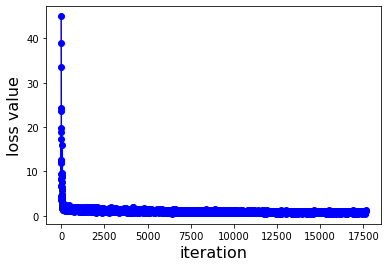

In [66]:
model.train(train, val, test, verbose = True)

In [ ]:
opt = torch.optim.Adam(self.model.parameters(), lr = lr, weight_decay = decay)

Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 1.15412. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 1.21943. Total time 0.00388 hours
Training at Epoch 1 iteration 200 with loss 1.30178. Total time 0.0075 hours
Training at Epoch 1 iteration 300 with loss 1.33382. Total time 0.01111 hours
Training at Epoch 1 iteration 400 with loss 1.15839. Total time 0.01472 hours
Training at Epoch 1 iteration 500 with loss 1.02808. Total time 0.01833 hours
Training at Epoch 1 iteration 600 with loss 1.21334. Total time 0.02166 hours
Training at Epoch 1 iteration 700 with loss 1.13555. Total time 0.025 hours
Training at Epoch 1 iteration 800 with loss 1.21399. Total time 0.02805 hours
Training at Epoch 1 iteration 900 with loss 1.21521. Total time 0.03138 hours
Training at Epoch 1 iteration 1000 with loss 0.94039. Total time 0.03444 hours
Training at Epoch 1 iteration 1100 with loss 1.20371. Total time 0.0375 hours
Traini

Training at Epoch 2 iteration 4400 with loss 0.77769. Total time 0.42861 hours
Training at Epoch 2 iteration 4500 with loss 0.93756. Total time 0.43388 hours
Training at Epoch 2 iteration 4600 with loss 0.65804. Total time 0.43861 hours
Training at Epoch 2 iteration 4700 with loss 1.26085. Total time 0.44333 hours
Training at Epoch 2 iteration 4800 with loss 0.86659. Total time 0.44805 hours
Training at Epoch 2 iteration 4900 with loss 0.86138. Total time 0.4525 hours
Training at Epoch 2 iteration 5000 with loss 0.97138. Total time 0.45722 hours
Training at Epoch 2 iteration 5100 with loss 0.92447. Total time 0.4625 hours
Training at Epoch 2 iteration 5200 with loss 0.87016. Total time 0.4675 hours
Training at Epoch 2 iteration 5300 with loss 1.05770. Total time 0.47222 hours
Training at Epoch 2 iteration 5400 with loss 0.72781. Total time 0.47694 hours
Training at Epoch 2 iteration 5500 with loss 1.14731. Total time 0.48138 hours
Training at Epoch 2 iteration 5600 with loss 0.66747. T

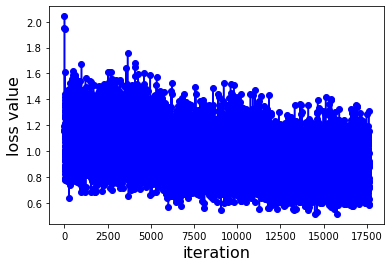

In [27]:
cmodel.train(train, val, test, verbose = True)

In [36]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils import data
from torch.utils.data import SequentialSampler
from torch import nn 

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import mean_squared_error, roc_auc_score, average_precision_score, f1_score, log_loss
from lifelines.utils import concordance_index
from scipy.stats import pearsonr
import pickle 
torch.manual_seed(2)
np.random.seed(3)
import copy
from prettytable import PrettyTable

import os

from DeepPurpose.utils import *
from DeepPurpose.model_helper import Encoder_MultipleLayers, Embeddings        
from DeepPurpose.encoders import *

ImportError: cannot import name 'eval' from 'torch' (C:\ProgramData\Anaconda3\envs\multiPurpose\lib\site-packages\torch\__init__.py)

In [21]:
		params = {'batch_size': config['batch_size'],
	    		'shuffle': True,
	    		'num_workers': config['num_workers'],
	    		'drop_last': False}
training_generator = data.DataLoader(data_process_loader(train.index.values, train.Label.values, train, **config), **params)

In [26]:
print(len(training_generator))

5873


In [28]:
		validation_generator = data.DataLoader(data_process_loader(val.index.values, val.Label.values, val, **config), **params)
		

In [41]:
def test2(data_generator, model, repurposing_mode = False, test = False):
        y_pred = []
        y_label = []
        model = torch.load(model)
        model.eval()
        for i, (v_d, v_p, label) in enumerate(data_generator):
            if self.drug_encoding == "MPNN" or self.drug_encoding == 'Transformer':
                v_d = v_d
            else:
                v_d = v_d.float().to(self.device)                
            if self.target_encoding == 'Transformer':
                v_p = v_p
            else:
                v_p = v_p.float().to(self.device)                
            score = self.model(v_d, v_p)
            if self.binary:
                m = torch.nn.Sigmoid()
                logits = torch.squeeze(m(score)).detach().cpu().numpy()
            else:
                logits = torch.squeeze(score).detach().cpu().numpy()
            label_ids = label.to('cpu').numpy()
            y_label = y_label + label_ids.flatten().tolist()
            y_pred = y_pred + logits.flatten().tolist()
            outputs = np.asarray([1 if i else 0 for i in (np.asarray(y_pred) >= 0.5)])
        model.train()
        if self.binary:
            if repurposing_mode:
                return y_pred
            ## ROC-AUC curve
            if test:
                roc_auc_file = os.path.join(self.result_folder, "roc-auc.jpg")
                plt.figure(0)
                roc_curve(y_pred, y_label, roc_auc_file, self.drug_encoding + '_' + self.target_encoding)
                plt.figure(1)
                pr_auc_file = os.path.join(self.result_folder, "pr-auc.jpg")
                prauc_curve(y_pred, y_label, pr_auc_file, self.drug_encoding + '_' + self.target_encoding)

            return roc_auc_score(y_label, y_pred), average_precision_score(y_label, y_pred), f1_score(y_label, outputs), log_loss(y_label, outputs), y_pred
        else:
            if repurposing_mode:
                return y_pred
            return mean_squared_error(y_label, y_pred), pearsonr(y_label, y_pred)[0], pearsonr(y_label, y_pred)[1], concordance_index(y_label, y_pred), y_pred


In [68]:
auc, auprc, f1, loss, logits = models.DBTA.test_(model, validation_generator, model.model)

In [69]:
print(auprc)

0.8195107176918168


In [67]:
model.save_model('./model-9-24')

In [70]:
print(auc)

0.805318809519073


In [58]:
cmodel.save_model('./model-9-23c')